# Music Information Retrieval Based On The Free Music Archive Dataset


In [1]:
%matplotlib inline

import os,IPython
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from librosa.display import waveplot,specshow
from librosa.onset import onset_strength, onset_detect
from librosa.feature import melspectrogram, mfcc
from librosa.core import zero_crossings
from librosa import load


from collections import OrderedDict
from librosa import load
from sklearn.preprocessing import LabelEncoder


# Song Extraction from fma_small

1. Find the song folder path relative to the current computer
2. Identify each song via its full path to song using index, to guarantee one-to-one mapping and Retrieve the different genre classifications.
3. Retrieve each song via its path and display the waveform
3. Split the song into different segments
4. Retrieve time domain features
5. Retrieve frequency domain features

### 1. This uses the Python Operating System (OS) library to access the file system that is unique to each OS .This enables to the code to be reused without modifying for individual computers

In [2]:
#retrieving path to the fma_small directory and the corresponding meta data
HOME_DIR = IPython.utils.path.get_home_dir()
temp = join(HOME_DIR, 'Documents')
path_to_small_fma = join(temp, 'fma_small')

#locate meta_data
json_file = join(path_to_small_fma,'fma_small.json')
print(path_to_small_fma)
df = pd.read_json(json_file)
print(json_file)


/Users/chibmac/Documents/fma_small
/Users/chibmac/Documents/fma_small/fma_small.json


### 2. The genres and the train/test split are stored in the the json meta data associated with the cleaned FMA dataset from the LTS2 lab

In [3]:
df.shape

(4000, 30)

In [4]:
#only choose top genre as the label
df = df.loc[:,['top_genre','train']]

#ensure that the genre name matches file name in fma_small, 
#i.e Oldtime / Historian conflict issue
df['top_genre']=df['top_genre'].apply(lambda y: y.split(os.sep)[0].strip())
#locate each individual song by its full path
df['temp'] = path_to_small_fma
str_index = ["%.2d" % x for x in df.index]

complete_genre_list_df = pd.DataFrame(df['top_genre'].unique(), columns = ['Genre'])

#create full path to file and store as a single array
df['full_path_to_song'] = df.temp.map(str)+ "/"+ df['top_genre'].values+ "/"+ str_index+ ".mp3"
del df['temp']
#keep songs according to alphabetical order of songs 
df.sort_values(by = 'top_genre', inplace = True)
df.head()


,top_genre,train,full_path_to_song
100538,Electronic,True,/Users/chibmac/Documents/fma_small/Electronic/...
43206,Electronic,True,/Users/chibmac/Documents/fma_small/Electronic/...
43199,Electronic,True,/Users/chibmac/Documents/fma_small/Electronic/...
43153,Electronic,True,/Users/chibmac/Documents/fma_small/Electronic/...
43124,Electronic,True,/Users/chibmac/Documents/fma_small/Electronic/...


In [5]:
df['full_path_to_song'][:1].values

array(['/Users/chibmac/Documents/fma_small/Electronic/100538.mp3'], dtype=object)

In [6]:
complete_genre_list_df

,Genre
0,Electronic
1,Rock
2,Old-Time
3,Indie-Rock
4,Jazz
5,Folk
6,Pop
7,Psych-Rock
8,Punk
9,Hip-Hop


### 3. To split the song into different segments
- Take the shortest length song possible in the dataset and reduce all songs to that length
- Select two songs as demos
- Plot graphs of the signals

In [7]:
#%%time
num_of_songs = 3
num_of_mfcc = 12
sampling_rate = 44100
min_song_length = 1322496
num_of_songs = df.values.shape[0]
num_of_songs

4000

In [8]:
base_path = df['full_path_to_song'].values[0][:35]
base_path

'/Users/chibmac/Documents/fma_small/'

In [9]:
elec_song_genre = df.iloc[399:400,0].values[0]
elec_song_num = df.iloc[399:400,0].index[0]
elec_path = base_path+elec_song_genre+"/"+str(elec_song_num)+".mp3"
example_elec = load(elec_path, sr = sampling_rate)[0]
elec_path

'/Users/chibmac/Documents/fma_small/Electronic/108431.mp3'

In [10]:
folk_song_genre = df.iloc[799:800,0].values[0]
folk_song_num = df.iloc[799:800,0].index[0]
folk_path = base_path+folk_song_genre+"/"+str(folk_song_num)+".mp3"
example_folk = load(folk_path, sr = sampling_rate)[0]
folk_path

'/Users/chibmac/Documents/fma_small/Folk/3631.mp3'

In [11]:
demo_paths = [elec_path,folk_path]
demo_paths

['/Users/chibmac/Documents/fma_small/Electronic/108431.mp3',
 '/Users/chibmac/Documents/fma_small/Folk/3631.mp3']

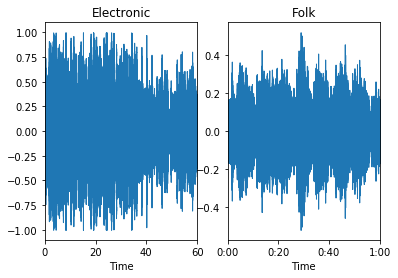

In [12]:
plt.subplot(1,2,1)
waveplot(example_elec)
plt.title(elec_song_genre)

plt.subplot(1,2,2)
waveplot(example_folk)
plt.title(folk_song_genre)

### 3. To split the song into different segments
- We take the shortest length song possible in the dataset and reduce all songs to that length
- Break the song into a specified number of segments 

In [13]:
default_fft = 2048
#this ensures that the 
demo_length = min_song_length-(min_song_length%default_fft)
demo_elec_song_f = example_elec[:demo_length-1]
demo_elec_song_t = example_elec[:demo_length]

demo_length

1320960

In [14]:
num_of_frames  = int(demo_length/default_fft) - int(demo_length/default_fft)%10
num_of_frames

640

In [15]:
#the number of frames will always be a factor of 2048 and in addition 5,10 since it ends is rounded to nearest 10
segments_list = [1,2,4,5,8,10]
#setting the number of segments to 10
num_of_segments = segments_list[-1]
num_of_segments

10

In [16]:
num_of_frames_per_segment = int(num_of_frames/num_of_segments)
num_of_frames_per_segment

64

In [17]:
num_of_subframes = int(np.floor((min_song_length*4)/default_fft))
#num_of_frames = num_of_frames-(num_of_frames%10)
num_of_subframes_per_segment = int(num_of_subframes/num_of_segments)
num_of_subframes_per_segment


258

In [18]:
song_into_segments = np.reshape(demo_elec_song_t,(num_of_segments,ind_song_into_segment))
song_into_segments.shape

NameError: name 'ind_song_into_segment' is not defined

# Computing  Time Domain Features

### The Time Domain Features that are in this project the Zero Crossings and the Onsets

## Zero Crossings is the number of times that the song signals crosses the axis. 
- The librosa zero crossings function returns binary values, showing whether or not the song signal crossed the axis
- The summation is across binary values to used to count the number of zero crossings
- Reshape dependent on the number of segments

In [ ]:
zcr_features_per_segment = np.sum(zero_crossings(song_into_segments),axis = 1) #zero crossings returns boolean values
zcr_features_per_segment = np.reshape(zcr_features_per_segment,(zcr_features_per_segment.shape[0],1))
for i in range (num_of_segments):
    print("Segment number %d: has %d zero crossings"%(i+1,zcr_features_per_segment[i]))

zcr_features_per_segment.shape

## Onsets 
### 1 . 

In [ ]:
onset_frames = onset_detect(y=demo_elec_song_t, sr=sampling_rate, units='samples')
onset_length = len(onset_frames)
onset_frames

In [ ]:
song_splitter = np.arange(0,len(demo_elec_song_t)+1, ind_song_into_segment,dtype=int)
split_length = len(song_splitter)
song_splitter

In [ ]:
total_onsets = [0]
for i in range(1,len(song_splitter)):
    total_onsets.append(np.sum(onset_frames<song_splitter[i]))

total_onsets

In [ ]:
total_onset_diff = np.diff(total_onsets)
onsets_features_per_segment = np.reshape(total_onset_diff,(len(total_onset_diff),1))
for i in range (num_of_segments):
    print("Segment number %d: has %d onsets"%(i+1,onsets_features_per_segment[i]))

onsets_features_per_segment.shape

In [ ]:
time_domain_features = np.concatenate((zcr_features_per_segment,onsets_features_per_segment),axis =1)
time_domain_features

# Computing  Frequency Domain Features

### The Frequency Domain Features used in this project are the Mel-Frequency Cepstral Coefficients (MFCCs) 

## Spectral Centroid

In [ ]:
%%time
complete_ds = np.zeros((10,3))

for i in range(len(demo_paths)):
    curr_song = load(df['full_path_to_song'].values[i],sr = sampling_rate)[0][:min_song_length]
    curr_genre = df['top_genre'].values[i]
    curr_train = df['train'].values[i]
    mfcc_per_segment = mfcc(y=curr_song, sr=sampling_rate,
                                         n_mfcc=num_of_mfcc).T
 


In [ ]:
curr_genre

In [ ]:
curr_train

In [ ]:
mfcc_per_segment.shape

In [ ]:
ok = np.zeros(mfcc_per_segment.shape)

In [ ]:
ok.shape

In [ ]:
ok.shape

In [ ]:
mfcc_per_segment.shape

In [ ]:
def complete_extract_features(song,num_of_mfcces,genre,train):
    #print("i am here",song.shape)
    try:
        min_song_length = 1322496
        short_song_length = int(min_song_length/2)
        short_song_length = short_song_length-(short_song_length%2048)
        #print("over here again")
        print("I got in")
        num_of_frames = int(short_song_length/2048)
        #number of frames to nearest 10 
        num_of_frames = num_of_frames-(num_of_frames%10)
        
        #the number of frames will always be a factor of 2048 and in addition 5,10 since it ends is rounded to nearest 10
        segments_list = [1,2,4,5,8,10]
        num_of_segments = segments_list[-1]
        
        num_of_frames_per_segment = int(num_of_frames/num_of_segments)
        
        shortest_song_length = num_of_frames *2048
        
        num_of_subframes = int(np.floor((shortest_song_length*4)/2048))
        #num_of_frames = num_of_frames-(num_of_frames%10)
        num_of_subframes_per_segment = int(num_of_subframes/num_of_segments)

        print("I got in")
        song_f = song[:shortest_song_length -1] 
        song_t = song[:shortest_song_length] 
        ind_song_into_segment = int(len(song_t)/num_of_segments)
        song_into_segments = np.reshape(song_t,(num_of_segments,ind_song_into_segment))

        
        zcr_features_per_segment = np.sum(librosa.core.zero_crossings(song_into_segments),axis = 1) #zero crossings returns boolean values
        zcr_features_per_segment = np.reshape(zcr_features_per_segment,(zcr_features_per_segment.shape[0],1))
        print("I got in")
        onset_frames = librosa.onset.onset_detect(y=song_t, sr=sampling_rate, units='samples')
        onset_length = len(onset_frames)
        song_splitter = np.arange(0,len(song_t)+1, ind_song_into_segment,dtype=int)
        split_length = len(song_splitter)
        total_onsets = [0]
        
        print("I got in")
        for i in range(1,len(song_splitter)):
            total_onsets.append(np.sum(onset_frames<song_splitter[i]))

        total_onset_diff = np.diff(total_onsets)
        onsets_features_per_segment = np.reshape(total_onset_diff,(len(total_onset_diff),1))
        time_domain_features = np.concatenate((zcr_features_per_segment,onsets_features_per_segment),axis =1)

        #print("over here again1")
        mfcc_per_segment = librosa.feature.mfcc(y=song_f, sr=sampling_rate,
                                         n_mfcc=num_of_mfcc).T
        mfcc_per_segment = np.reshape(mfcc_per_segment,(num_of_segments,num_of_subframes_per_segment,num_of_mfcc))

        mean_mfcc_per_segment = np.mean(mfcc_per_segment,axis=1)
        var_mfcc_per_segment = np.var(mfcc_per_segment,axis =1)
        skew_mfcc_per_segment = scipy.stats.skew(mfcc_per_segment,axis =1)
        kurtosis_mfcc_per_segment = scipy.stats.kurtosis(mfcc_per_segment,axis =1)
        #print("over here again2")
        spectral_centroid = librosa.feature.spectral_centroid(y=song_f, sr=sampling_rate).T
        spc_per_segment = np.reshape(spectral_centroid, (num_of_segments,num_of_subframes_per_segment))

        mean_spc_per_segment = np.mean(spc_per_segment,axis=1)
        mean_spc_per_segment = np.reshape(mean_spc_per_segment,(len(mean_spc_per_segment),1))
        var_spc_per_segment = np.var(spc_per_segment,axis =1)
        var_spc_per_segment = np.reshape(var_spc_per_segment,(len(var_spc_per_segment),1))
        skew_spc_per_segment = scipy.stats.skew(spc_per_segment,axis =1)
        skew_spc_per_segment = np.reshape(skew_spc_per_segment,(len(skew_spc_per_segment),1))
        kurtosis_spc_per_segment = scipy.stats.kurtosis(spc_per_segment,axis =1)
        kurtosis_spc_per_segment = np.reshape(kurtosis_spc_per_segment,(len(kurtosis_spc_per_segment),1))

        spc_features_per_segment = np.concatenate((mean_spc_per_segment,var_spc_per_segment,skew_spc_per_segment,kurtosis_spc_per_segment),axis = 1)
        #print("over here again3")
        freq_domain_feat_per_segment = np.concatenate((mfcc_features_per_segment,spc_features_per_segment),axis =1)
        
        features_per_segment= np.concatenate((time_domain_features,freq_domain_feat_per_segment),axis =1)
        
        #fps_x,fps_y = features_per_segment.shape
        #features_per_segment = np.reshape(features_per_segment,(1,fps_x*fps_y))

    except:        
        print("There was an error whilst computing the features")
    return features_per_segment
    

In [ ]:
!pwd

In [ ]:
print("The number of genres is:", len(df['top_genre'].value_counts().sort_index()))

In [ ]:
le = LabelEncoder()
genres= np.repeat(df['top_genre'].values,10,axis=0)
print(genres.shape)
encoded_genres= le.fit(genres)
train_labels = np.repeat(np.squeeze(df.loc[:,['train']].values), 10,axis = 0)
print(train_labels.shape)
encoded_genres

#Label Encoding Mapping
encoder_df= pd.DataFrame(data= {'Genre':genres,
                   'Encoded_Genre':le.transform(genres),
                               'Train': train_labels})
encoder_df.head()


In [ ]:
%%time
num_of_songs = 3
sampling_rate = 44100

genre_signals_dict = OrderedDict()
#creates a dictionary of the signals in a genre and their raw file
for genre_path_name,genre_paths in paths_dict.items():
    str1=genre_path_name[:-5]
    str2 = "signals"
    genre_signals = "".join((str1,str2))       
    try:
        first_three = genre_paths[:num_of_songs]
        genre_signals_dict[genre_signals] = [
        load(p,sr=None)[0] for p in first_three]
    except IOError as exc:
        print("Unable to locate folder")
        #raise IOError("%s: %s" % (genre_paths, exc.strerror))
        
#genre_signals_dict
#{genre_signals_name:genre_signals_paths}
print("{'Electronic_signals:[array_of_all_electronic_paths]}")

In [ ]:
song_counts = [] 
ordered_genres = [] 
full_song_df = OrderedDict()
genre_to_song_dict = {}

#retrieve number of songs per genre
genre_and_count = df['top_genre'].value_counts().sort_index()
all_songs_path = df['full_path_to_song'].values  


#retrieve number of songs per genre with the order preserved in two lists
#ordered_genres
#song_counts
for i,genre in enumerate(genre_and_count.index):
    ordered_genres.append(genre)
    temp = df['top_genre'].value_counts()[genre]
    song_counts.append(temp)

genre_to_song_zipped = zip(ordered_genres,song_counts)

num_of_genre = np.shape(genre_and_count)[0]
print("The number of genres is:", num_of_genre)

#dictionary with each song count and its corresponding genre
for genre,song_count in genre_to_song_zipped:
    genre_to_song_dict[genre] = song_count

genre_to_song_dict

In [ ]:
song1, sampling_rate1 = load("/Users/chibmac/Documents/fma_small/Electronic/43206.mp3")
song2, sampling_rate2 = load("/Users/chibmac/Documents/fma_small/Electronic/43124.mp3")

In [ ]:
genre_to_song_zipped